<a href="https://colab.research.google.com/github/subodha1980/BU/blob/master/activityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificaill Inteligence Assignment

Department of Computing and Informatics,
Faculty of Science and Technology,
Bournemouth University.

## 1. Introduction

    

Physical activity recognition is an integral part of athlete workload management in professional sports and patient management related to ilnesses such as chronic kidney deceases. This work is focussed on physical activity detection of individuals using the sensory data obtained from wearable sensors.

## 2. Problem Definition








Physical activity recognition requires to distinguish different physical movements carried out by the individuals such as walking, running, cycling, etc. This requires accurate prediction of physical movements using sensory data such as videos, accelerometer readings, and heart rate measurements. We have obtained accellerometer readings from five wearable sensors placed in wrists, anckles and chest of athletes as shown in Figure 1. It is required to analyze the data to accurately predict the actual activities carried out by the individuals while wearing the sensors.



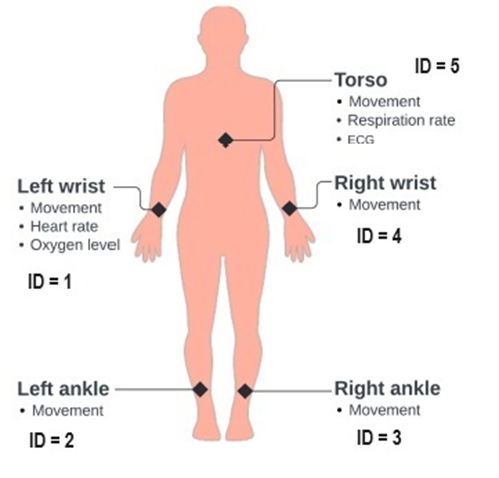

                            Figure 1




We hypothesize that machine learning models can accurately predict the activities carried out by athletes, including running, walking, and exercising. Further, the model will be able to identify the out of distribution (OOD) data samples such as cycling

##3. Objectives



Aim:
Our aim is to accurately predict athlete activities using accelerometer readings obtained by wearable sensors


Objectives:
1.  Study supervised learning techniques and chose ML algorithms that can be used for activity recognition
2.	Predicting the class of an activity given the accelerometer readings of a particular point of time
3.	Identify the most significant sensor position or combination of sensor positions in activity recognition.
4.	Use a ML model to predict the class of the activity given the accelerometer readings of a particular time duration.


## 4. Description of Data

Each accellerometer reading consist of data from three different axises making it fifteen different axises for five sensors. Sensor readings are denoted by X_i, Y_i, Z_i, where i ∈ {1,2,3,4,5} denotes the sensor ID as given in Figre 1.Data is obtained for six activities namely, walking, running, Push-ups, Squats,Cycling, and playing Table tennis. One .csv file is created for each each activity. Howevr, the number of readings obtained each activity is not the same.

##5. Analysis

Data is read from the .csv files and analysed after cleaning and preprocessing.

###5.1. Load Libraries

Mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the required python libraries for general data manipulation and data analysis using machine learning.

In [3]:
# Load Libraries
#Libraries for data manipulation
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Libraries for data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Libraries for validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

#Libraries for Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Utility libraries
import time
from scipy import interpolate

#tensorflow libruaries
#!pip install tensorflow
#!pip install scikit-learn
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



Ignore warnings

In [4]:
import warnings

warnings.filterwarnings('ignore')

###5.2. Read data files

Data files can be stored in the local folder or the local google drive. If the file is not locally found, the program will search for the file in specified remote google drive.

####5.2.1 Define file names

In [5]:
import os

cycling = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv"
cycling_1 = "Cycling.csv"
cycling_2 ="https://drive.google.com/file/d/1pjVqvGlm_TPEb8x2ZyDkY17LShmCoBvG/view?usp=drive_link"
pushup = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv"
pushup_1 = "Pushup.csv"
pushup_2 = "https://drive.google.com/file/d/1yF2hqwdfTpDvpUhDDlaA0QOKIN0GG8CI/view?usp=drive_link"
run = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Run.csv"
run_1 = "Run.csv"
run_2 = "https://drive.google.com/file/d/1ortW7OL4gmOvIT40RDa0lgrd1Sg6c7NI/view?usp=drive_link"
squat= "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Squat.csv"
squat_1 = "Squat.csv"
squat_2 = "https://drive.google.com/file/d/1qFXds2VnypOw8aq5SM0VhaQiajF0RZSR/view?usp=drive_link"
tennis = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Table Tennis.csv"
tennis_1 = "Table Tennis.csv"
tennis_2 = "https://drive.google.com/file/d/1N6-PTB5XqsiVLGjVulX1abzJRSXnchuY/view?usp=drive_link"
walk = "/content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Walk.csv"
walk_1 = "Walk.csv"
walk_2 = "https://drive.google.com/file/d/1CavHOnkKbsls_GtnSUMp6Knju3W1a3Hi/view?usp=drive_link"

activityList = ['cycling','pushup','run','squat','tennis','walk']
fileNames = [[cycling,cycling_1,cycling_2],
            [pushup,pushup_1,pushup_2],
             [run,run_1,run_2],
             [squat,squat_1,squat_2],
             [tennis,tennis_1,tennis_2],
             [walk,walk_1,walk_2]]
names = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5','Activity']

####5.2.2 Open files

In [9]:
raw_data = [] # List to store data

# Function to get the file name (check the local google drive and local folder)
def get_file_name(name, name1_1):
  if os.path.exists(name):
      return name
  elif os.path.exists(name1_1):
      return name1_1
  else:
      raise FileNotFoundError(f"File does not exist in local google drive...Reading from the shared google drive ...")

# Read data from all six activities
# Get the file name from local google drive, it not get it from shared google drive
# Open the file, read data, and append data to to data[] list
for index in range(0,6):
  try:
      path = get_file_name(fileNames[index][0],fileNames[index][1])
      print("\n====== Path: ",path)
  except FileNotFoundError as e:
      print(e)
      path = fileNames[index][2]

  try:
      raw_data.append(pd.read_csv(path,names=names,skiprows=1))
      print("File successfully read....")
      print("\n --Head--")
      print(raw_data[index].head(2))
      print("\n --Tail--")
      print(raw_data[index].tail(2))
  except Exception as e:
      # Handle the error if reading the CSV file fails
      print("Error reading file:", e)



====== Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Cycling.csv
File successfully read....

 --Head--
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

  Activity  
0    Cycle  
1    Cycle  

 --Tail--
        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
52444  430  504  458  613  543  536  361  562  538  526  488  417  515  379   
52445  373  457  452  608  538  541  324  542  553  587  478  394  517  366   

        Z5 Activity  
52444  527    Cycle  
52445  529    Cycle  

====== Path:  /content/drive/MyDrive/Colab Notebooks/AI/Assignment/Data/Pushup.csv
File successfully read....

 --Head--
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  

*   It seems like there are NULL values

###5.3 Visualuze data

We need to combine the datasets for analysis. However, before combining we have to identify the size of data points (instances) and the type of data in each column (feature).

#### 5.3.1 View size of data sets

In [14]:
for activity, df in zip(activityList, raw_data):
    print(f"{activity}: {df.shape}")
    print(df.info())
    print('\n')

cycling: (52446, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52446 entries, 0 to 52445
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   X1        52446 non-null  int64 
 1   Y1        52446 non-null  int64 
 2   Z1        52446 non-null  int64 
 3   X2        52446 non-null  int64 
 4   Y2        52446 non-null  int64 
 5   Z2        52446 non-null  int64 
 6   X3        52446 non-null  int64 
 7   Y3        52446 non-null  int64 
 8   Z3        52446 non-null  int64 
 9   X4        52446 non-null  int64 
 10  Y4        52446 non-null  int64 
 11  Z4        52446 non-null  int64 
 12  X5        52446 non-null  int64 
 13  Y5        52446 non-null  int64 
 14  Z5        52446 non-null  int64 
 15  Activity  52446 non-null  object
dtypes: int64(15), object(1)
memory usage: 6.4+ MB
None


pushup: (6844, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 16 columns):
 #

In [12]:
# check the shape of six data sets
index = 0
for df in raw_data:
  print(activityList[index],':',df.shape)
  print(raw_data[index].info())
  index = index  + 1
  print('\n')

cycling : (52446, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52446 entries, 0 to 52445
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   X1        52446 non-null  int64 
 1   Y1        52446 non-null  int64 
 2   Z1        52446 non-null  int64 
 3   X2        52446 non-null  int64 
 4   Y2        52446 non-null  int64 
 5   Z2        52446 non-null  int64 
 6   X3        52446 non-null  int64 
 7   Y3        52446 non-null  int64 
 8   Z3        52446 non-null  int64 
 9   X4        52446 non-null  int64 
 10  Y4        52446 non-null  int64 
 11  Z4        52446 non-null  int64 
 12  X5        52446 non-null  int64 
 13  Y5        52446 non-null  int64 
 14  Z5        52446 non-null  int64 
 15  Activity  52446 non-null  object
dtypes: int64(15), object(1)
memory usage: 6.4+ MB
None


pushup : (6844, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 16 columns):


We have to check the labels for consistency

#### 5.3.2 Check label consistency

In [11]:
for df in raw_data:
  print('\n-----------------')
  print(df['Activity'].unique())


-----------------
['Cycle']

-----------------
['Pushup']

-----------------
['Run']

-----------------
['Squat' nan]

-----------------
['Table Tenis']

-----------------
['Walk']


*   There are NULL values in labels as well


**We have to consider the following in our data preperation.**



1.   For predicting the class of an activity given the accelerometer readings of a particular point of time (Objective 2), each data point is one instance of data for ML model. Hence, we can remove NULL rows and drop the rows as required. Therefore, we combine the data and start cleaning.

2.   In order to predict the class of the activity given the accelerometer readings of a particular time duration (Objective 4), number of rows (data points) creates one instance of data for the ML model. Here, we can't just remove a row or drop a row of data.  


###5.3 predicting the class of an activity given the accelerometer readings of a particular point of time

#### 5.3.1 Combine Datasets


In [18]:
# Prepare the 'dataset' by concatinating individual datasets
dataset = pd.concat(raw_data, ignore_index=True)
# Shape of the combined dataset
print("Shape of combined dataset:", dataset.shape)
print('\nSummary of Data:\n')
print(dataset.groupby('Activity').size())

Shape of combined dataset: (171724, 16)

Summary of Data:

Activity
Cycle          52446
Pushup          6844
Run             9987
Squat          12229
Table Tenis    67699
Walk           20300
dtype: int64


####5.3.2 Clean Data

####5.3.2 Remove Nulls

##### Check for Null values

In [ ]:
data = raw_data.copy()
#Check for Null records
for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          1
Y1          1
Z1          1
X2          1
Y2          1
Z2          1
X3          1
Y3          1
Z3          1
X4          1
Y4          1
Z4          1
X5          1
Y5          1
Z5          1
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          2219
Y1          2219
Z1          2219
X2          2219
Y2          2219
Z2          2219
X3          2219
Y3          2219
Z3          2219
X4          2219
Y4          2219

##### Remove Null values and check again

In [ ]:
for index in range(0,6):
  data[index].replace('', np.nan, inplace=True)
  data[index].dropna(inplace=True)
  print(activityList[index])
  print('.................')
  print(data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

In [ ]:
#Remove Null records
dataWithoutNulls = []

for index in range(0,6):
  nulls = data[index].isnull().any(axis=1)
  dataWithoutNulls.append(data[index][~nulls])


# Display the shape of each dataset after removing Nulls
for index in range(0,6):
  print(activityList[index],':',dataWithoutNulls[index].shape)

#clear memory : If we need the data we can comment this out
#del(data)

cycling : (52446, 16)
pushup : (6843, 16)
run : (9987, 16)
squat : (12229, 16)
tennis : (67699, 16)
walk : (20300, 16)


#### 5.3.3 Remove duplicates

In [ ]:
# identify duplicates and remove them
dataWithoutDup = []
for index in range(0,6):
  dups = dataWithoutNulls[index].duplicated()
  print(activityList[index])
  print('.................')
  print("Number of duplicates before romoving:", dups.sum())

  dataWithoutDup.append(dataWithoutNulls[index][~dups])

  dups = dataWithoutDup[index].duplicated()
  print("Number of duplicates after removing:", dups.sum())
  print('\n')

#clear memory : If we need the data we can comment this out
#del(dataWithoutNulls)

cycling
.................
Number of duplicates before romoving: 0
Number of duplicates after removing: 0


pushup
.................
Number of duplicates before romoving: 0
Number of duplicates after removing: 0


run
.................
Number of duplicates before romoving: 21
Number of duplicates after removing: 0


squat
.................
Number of duplicates before romoving: 11
Number of duplicates after removing: 0


tennis
.................
Number of duplicates before romoving: 18
Number of duplicates after removing: 0


walk
.................
Number of duplicates before romoving: 35
Number of duplicates after removing: 0




###5.4 Pre-process the data

#### 5.4.1 Encode the labels

In [ ]:
#Each data set is indexed
for index in range(0,6):
  dataWithoutDup[index]['Activity']= index
  print(dataWithoutDup[index].head(5))


    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   
2  491  558  371  634  517  501  376  488  511  634  623  381  528  370  508   
3  514  567  376  641  523  509  380  493  517  623  654  383  537  374  511   
4  519  567  384  645  523  512  380  493  523  605  654  399  540  378  511   

   Activity  
0         0  
1         0  
2         0  
3         0  
4         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   
2  383.0  499.0  475.0  561.0  592.0  540.0  465.0  620.0  551.0  617.0   
3  386.0  505.0  480.0  557.0  605.0  542.0  473.0  629.0  558.0  625.0   
4  386.0  508.0  483.0  555.0  620.0  548.0  473.0  632.0  5

#### 5.4.2 Combining the data sets to one

In [ ]:
dataset = pd.concat(dataWithoutDup, ignore_index=True)
# Shape of the combined dataset
print("Shape of combined dataset:", dataset.shape)

print(dataset.groupby('Activity').size())
#clear memory
#del(dataWithoutNulls)

Shape of combined dataset: (169419, 16)
Activity
0    52446
1     6843
2     9966
3    12218
4    67681
5    20265
dtype: int64


####5.4.3 Scaling the numerical fields

Scaling values of each feature into a common range

In [ ]:
dfPrep = dataset.copy()
# Scalling
from sklearn.preprocessing import MinMaxScaler
colNames = names[0:15]

scaler = MinMaxScaler()
dfPrep[colNames] = scaler.fit_transform(dfPrep[colNames])

####5.4.4 Visualize data

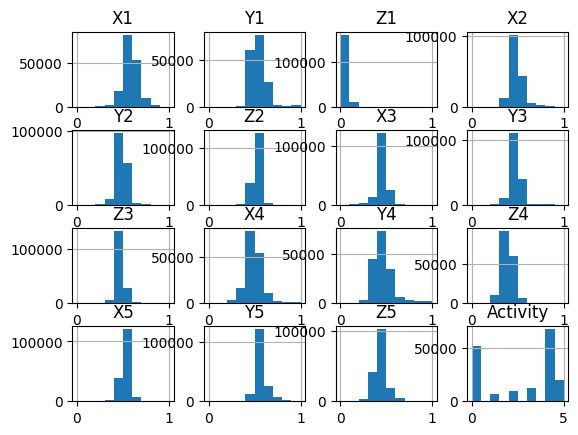

In [ ]:
dfPrep.hist()
plt.show()

##### Correlation matrix between features

In [ ]:
matrix = dfPrep.corr(numeric_only=True)
print(matrix)

                X1        Y1        Z1        X2        Y2        Z2  \
X1        1.000000 -0.053142 -0.066646 -0.107628  0.106517 -0.080777   
Y1       -0.053142  1.000000  0.250624  0.036730 -0.025801 -0.142223   
Z1       -0.066646  0.250624  1.000000  0.110449 -0.119127 -0.056561   
X2       -0.107628  0.036730  0.110449  1.000000 -0.160731  0.081406   
Y2        0.106517 -0.025801 -0.119127 -0.160731  1.000000  0.368120   
Z2       -0.080777 -0.142223 -0.056561  0.081406  0.368120  1.000000   
X3       -0.098559 -0.037664 -0.076334 -0.151759  0.043120 -0.033820   
Y3       -0.195401 -0.193845 -0.073430  0.038280 -0.166251  0.081981   
Z3       -0.147305 -0.111621  0.028209  0.108038 -0.028044  0.152446   
X4       -0.189848  0.116535  0.039479 -0.059759  0.166363  0.135360   
Y4       -0.248517  0.513222  0.248924  0.093666 -0.135262 -0.138321   
Z4       -0.089420  0.272123  0.414096  0.031825  0.017948 -0.111286   
X5       -0.035695 -0.065969 -0.079885  0.025517 -0.028391 -0.02

##### Heatmap of the correlatoin matrix

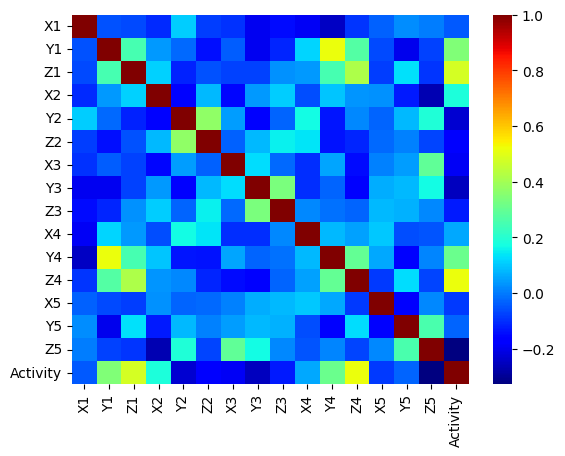

In [ ]:
import seaborn as sns
#sns.heatmap(matrix,cmap="coolwarm")
sns.heatmap(matrix,cmap="jet")
plt.show()



*   It can be observed that there is very low correlation between the features.

*   There is some correlation between Y1 and Y4 which is around 0.51

*   It is interesting to see that the activity has some correlation with Z1 and Z4

###5.5 Analyze data

####5.5.1 Split data into training and testing data

In [ ]:
x = dfPrep.drop(columns=['Activity'])
y = dfPrep['Activity']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

##### Visualize the train and test data

In [ ]:
print(X_train[0:4])
print('\n',Y_train[0:4])
print(X_test[0:4])
print('\n',Y_test[0:4])

              X1        Y1        Z1        X2        Y2        Z2        X3  \
143326  0.647979  0.614837  0.093188  0.532006  0.475216  0.500000  0.466667   
41444   0.641460  0.509146  0.059685  0.482219  0.454741  0.520788  0.450314   
66634   0.194263  0.911585  0.069891  0.378378  0.448276  0.503282  0.910692   
165936  0.418514  0.479675  0.076104  0.547653  0.496767  0.516411  0.454088   

              Y3        Z3        X4        Y4        Z4        X5        Y5  \
143326  0.426029  0.416178  0.307250  0.560292  0.371991  0.583942  0.539867   
41444   0.493882  0.508792  0.529344  0.386114  0.350109  0.510949  0.561462   
66634   0.497219  0.535756  0.892980  0.870889  0.423414  0.459854  0.641196   
165936  0.444939  0.475967  0.553510  0.400731  0.447484  0.496350  0.556478   

              Z5  
143326  0.484483  
41444   0.486207  
66634   0.410345  
165936  0.346552  

 143326    4
41444     0
66634     2
165936    5
Name: Activity, dtype: int64
              X1        

####5.5.2 Compare different supervised learning models

In [ ]:
models = []
models.append(('LR',LogisticRegression(solver='saga', multi_class='multinomial', C=1.0, penalty='l2', class_weight=None, max_iter=1000)))
#models.append(('LDA',LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', n_components=None, priors=None)))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier())) #modleik4gi34r
models.append(('AdaBoost',AdaBoostClassifier())) #ejfreuifhg
models.append(('CART',DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=10, splitter='best')))

In [ ]:
for model_name, model in models:   # a loop to choose the model defined in the above code
    results = cross_validate(model, x, y, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)

    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: ', results['test_f1_macro'].mean())
    print("---------------------------------------------------------")

LR:
Accuracy: train:  0.9127754070069785 | test:  0.8959086195608794
F1-score: train:  0.8781862181828558 | test:  0.8574244969812206
---------------------------------------------------------
KNN:
Accuracy: train:  0.9964968501554743 | test:  0.958941792144782
F1-score: train:  0.9961446415124694 | test:  0.9527578788885614
---------------------------------------------------------
NB:
Accuracy: train:  0.9437828590698881 | test:  0.9344463343904765
F1-score: train:  0.9329285968608201 | test:  0.9232283077625321
---------------------------------------------------------
RandomForest:
Accuracy: train:  1.0 | test:  0.963657842616756
F1-score: train:  1.0 | test:  0.9612511636170646
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8143743051149095 | test:  0.8178658438928077
F1-score: train:  0.7249819798358004 | test:  0.7289052662417607
---------------------------------------------------------
CART:
Accuracy: train:  0.9579681036706378 | test:  0.9

Highest accuracy and the F1 value are with the RandomForest algorithm. Therefore, we resort to RandomForest algorithm.

As the number of data points per label is not the same, the data set is not balanced. We can either undersample or oversample to balance the data set. We choose to random undersample the data set to match the reequency of each label is equal to the minimum frequency out of all.

####5.5.3 Random under sampling to make data sets equal in size

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

print("Class distribution before under-sampling:")
print(dataset.groupby('Activity').size())

# Separate features and target variable
x = dfPrep.drop(columns=['Activity'])
y = dfPrep['Activity']

# Perform random under-sampling
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

# Check the class distribution after under-sampling
print("\nClass distribution after under-sampling:")
print(y_resampled.value_counts())

Class distribution before under-sampling:
Activity
0    52446
1     6843
2     9966
3    12218
4    67681
5    20265
dtype: int64

Class distribution after under-sampling:
0    6843
1    6843
2    6843
3    6843
4    6843
5    6843
Name: Activity, dtype: int64


In [ ]:
model_name = 'RandomForest'
model = RandomForestClassifier()
results = cross_validate(model, x_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1_macro'], return_train_score=True)

print(model_name + ":")
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1_macro'].mean(), '| test: ', results['test_f1_macro'].mean())
print("---------------------------------------------------------")

RandomForest:
Accuracy: train:  1.0 | test:  0.9907447851755539
F1-score: train:  1.0 | test:  0.9907495837392665
---------------------------------------------------------


In [ ]:
# Function to plot the confuction matrix
def plotConfMatrix(conf_matrix):
  plt.figure(figsize=(4, 3))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

def runModel(model,x, y, split):
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x, y, test_size=split, random_state=42)

    # Train your model on the entire training set (without cross-validation)
    startTime = time.time()
    model.fit(Xf_train, Yf_train)
    endTime = time.time()

    print('Time to Train:',endTime-startTime,'Sec')


    # Make predictions on the test set
    startTime = time.time()
    Yf_pred = model.predict(Xf_test)
    endTime = time.time()

    print('Time to Test:',endTime-startTime,'Sec')

    # Compute and print the confusion matrix
    plotConfMatrix(confusion_matrix(Yf_test, Yf_pred))

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(Yf_test, Yf_pred)
    f1 = f1_score(Yf_test, Yf_pred, average='weighted')  # You can choose 'macro' or 'micro' as well

    print('Accuracy:', accuracy)
    print('F1-score:', f1)

    from sklearn.metrics import classification_report

    # Compute classification report
    report = classification_report(Yf_test, Yf_pred)

    print('\nClassification Report')
    print('-----------------------')
    # Print classification report
    print(report)


Time to Train: 6.9643943309783936 Sec
Time to Test: 0.13721895217895508 Sec


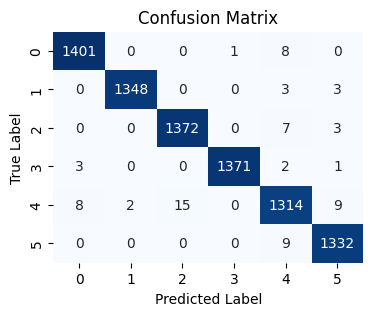

Accuracy: 0.9909887968826108
F1-score: 0.9909877480438603

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1410
           1       1.00      1.00      1.00      1354
           2       0.99      0.99      0.99      1382
           3       1.00      1.00      1.00      1377
           4       0.98      0.97      0.98      1348
           5       0.99      0.99      0.99      1341

    accuracy                           0.99      8212
   macro avg       0.99      0.99      0.99      8212
weighted avg       0.99      0.99      0.99      8212



In [ ]:
runModel(model,x_resampled, y_resampled, 0.2)




####5.5.4 Hyper parameter Optimization

In [ ]:
def runModelOpt(x, y, split):
    Xf_train, Xf_test, Yf_train, Yf_test = train_test_split(x, y, test_size=split, random_state=42)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],  # Number of trees in the forest
        'max_depth': [None, 10, 20],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }

    # Create a Random Forest classifier
    rf_model = RandomForestClassifier()

    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(Xf_train, Yf_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)

    # Use the best model obtained from grid search
    best_rf_model = grid_search.best_estimator_

    # Train your model on the entire training set (without cross-validation)
    startTime = time.time()
    best_rf_model.fit(Xf_train, Yf_train)
    endTime = time.time()

    print('Time to Train:', endTime - startTime, 'Sec')

    # Make predictions on the test set
    startTime = time.time()
    Yf_pred = best_rf_model.predict(Xf_test)
    endTime = time.time()

    print('Time to Test:', endTime - startTime, 'Sec')

    # Compute and print the confusion matrix
    plotConfMatrix(confusion_matrix(Yf_test, Yf_pred))

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(Yf_test, Yf_pred)
    f1 = f1_score(Yf_test, Yf_pred, average='weighted')  # You can choose 'macro' or 'micro' as well

    print('Accuracy:', accuracy)
    print('F1-score:', f1)

    # Compute classification report
    report = classification_report(Yf_test, Yf_pred)

    print('\nClassification Report')
    print('-----------------------')
    # Print classification report
    print(report)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9901358138741699
Time to Train: 12.778574705123901 Sec
Time to Test: 0.3228728771209717 Sec


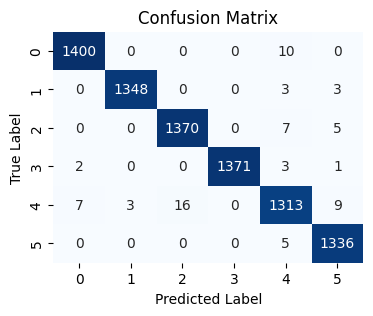

Accuracy: 0.9909887968826108
F1-score: 0.9909862143939209

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1410
           1       1.00      1.00      1.00      1354
           2       0.99      0.99      0.99      1382
           3       1.00      1.00      1.00      1377
           4       0.98      0.97      0.98      1348
           5       0.99      1.00      0.99      1341

    accuracy                           0.99      8212
   macro avg       0.99      0.99      0.99      8212
weighted avg       0.99      0.99      0.99      8212



In [ ]:
runModelOpt(x_resampled, y_resampled, 0.2)

####5.5.5 Identify featuers of importance

##### Obtain a copy of the cleaned data

We obtain a copy of the cleaned and encoded data.

In [ ]:
dfFeatureAnalysis = dfPrep.copy()

##### Calculate significance of each feature

In [ ]:
# Partioning the data
Xc = dfFeatureAnalysis.drop('Activity', axis=1)
yc = dfFeatureAnalysis['Activity']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,X1,9.157613
1,Y1,12.224525
2,Z1,10.132975
3,X2,4.302273
4,Y2,3.345892
5,Z2,4.456929
6,X3,4.311436
7,Y3,3.856095
8,Z3,1.940158
9,X4,9.340352


##### Display significance of each feature

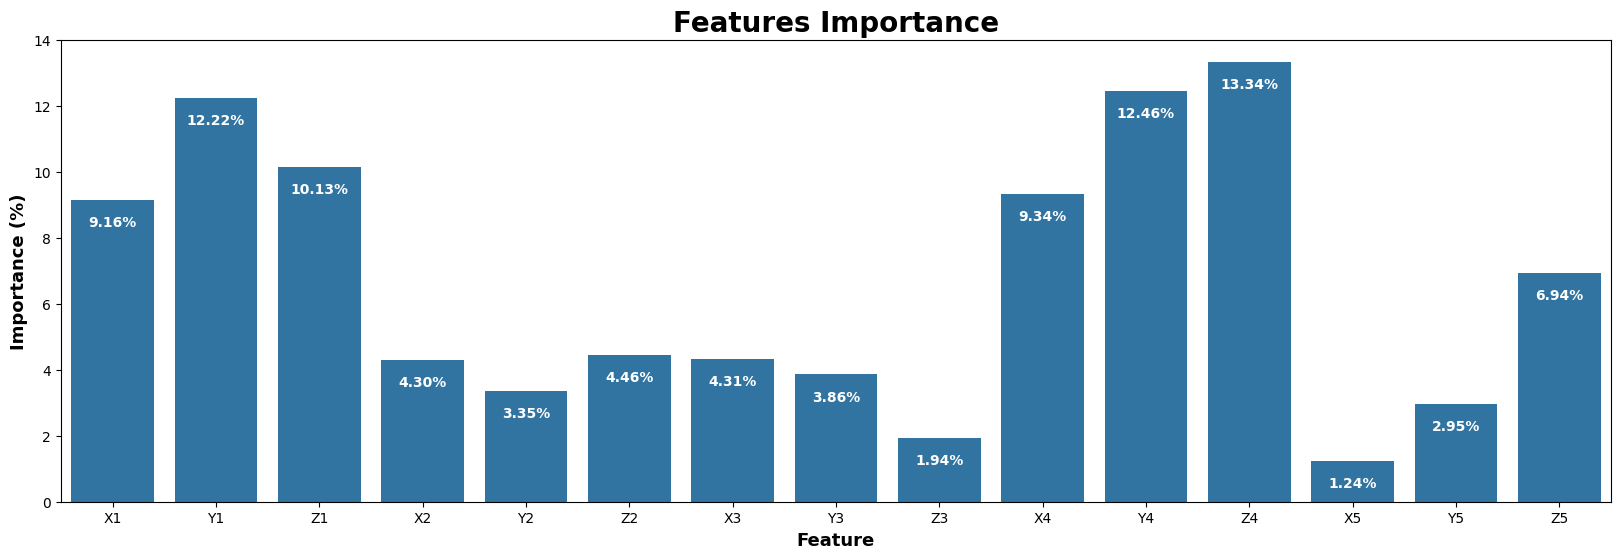

In [ ]:
# Features importance plot
plt.figure(figsize=[20,6])
sns.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

It can be observed that the most significant features are Y4 nad Z4. Further, the least significant features are X5 and X3. In the context of this application, we have to consider a group of features (X,Y, Z) belongs to one sensor at once. Therefore, the sensors which has most significant impact to the result are sensor 1 (features X1, Y1, and Z1) and sensor 4 (X4,Y4, and Z4)

####5.5.6 Run the model with most significant features

##### Remove the less signiticant features

In [ ]:
xf_resampled = x_resampled.copy()
xf_resampled.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
yf_resampled = y_resampled.copy()

##### Run the model and obtain the evaluation parameters

Time to Train: 19.477710962295532 Sec
Time to Test: 0.30718350410461426 Sec


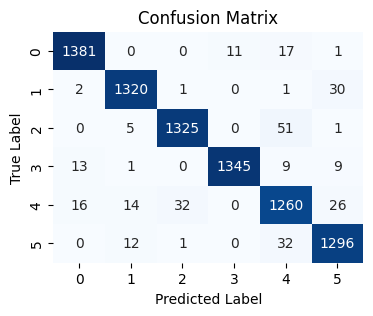

Accuracy: 0.9652946906965416
F1-score: 0.9653807621820447

Classification Report
-----------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1410
           1       0.98      0.97      0.98      1354
           2       0.97      0.96      0.97      1382
           3       0.99      0.98      0.98      1377
           4       0.92      0.93      0.93      1348
           5       0.95      0.97      0.96      1341

    accuracy                           0.97      8212
   macro avg       0.97      0.97      0.97      8212
weighted avg       0.97      0.97      0.97      8212



In [ ]:
runModel(clf, xf_resampled, yf_resampled, 0.2)

#### 5.5.6 Handling the data as a time-series data


So far, we have considered one data sample received from sensors (each line consisting of he 15 features) as one data point. However, in reality, one unit of human activity lasts for a number of samples (a frame). Therefore, we have to consider the following.


1.   Each data frame should contain a number of data points each having same set of features, making it a two dimensional arrray.
2.   The data samples are received in a sequence making it undesirable to rendomly remove samples in between when dropping the null values and during under sampling. hence, we will try to remove the numm values at the end of a data set and apply interpolation to approximate the missing values.
1.   We can't remove the duplicating records as they can be valid information in a data frame.






##### Check for NULL records

In [ ]:
#Check for Null records
for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(raw_data[index].isna().sum())
  print('\n')

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

##### Remove NULL records

Remove NULL records at the end and interpolate to replace NULLs in the middle

In [ ]:
data_wihtout_NULLs = raw_data.copy()

for dfm in data_wihtout_NULLs:
    # Remove rows with NULL values at the end
    dfm.dropna(axis=0, how='all', inplace=True)

    # Interpolate NULL values in the middle
    for col in dfm.columns:
        # Check if there are NULL values in the middle of the column
        if dfm[col].isnull().any():
            # Interpolate NULL values using linear interpolation
            dfm[col] = dfm[col].interpolate(method='linear')

for index in range(0,6):
  print(activityList[index])
  print('.................')
  print(data_wihtout_NULLs[index].isna().sum())
  print('\n')

  # Display the shape of each dataset after removing Nulls
for index in range(0,6):
  print(activityList[index],':',data_wihtout_NULLs[index].shape)

cycling
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


pushup
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


run
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5          0
Z5          0
Activity    0
dtype: int64


squat
.................
X1          0
Y1          0
Z1          0
X2          0
Y2          0
Z2          0
X3          0
Y3          0
Z3          0
X4          0
Y4          0
Z4          0
X5          0
Y5  

For the comparison purposes, we will create two data sets.

1.   Apply under smapling, which would randomly remove certain rows
2.   Truncate the data set to the size of the samllest



##### Balancing the data sets

Randomly remove rows of each data set to make them equal in size

In [ ]:
dataRandUSampled = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([data_wihtout_NULLs[index].shape[0] for index in range(6)])
print("Undersampling to size:", smallestSize)
for index in range(6):
    # If this dataset is larger than the smallest one, perform undersampling
    if data_wihtout_NULLs[index].shape[0] > smallestSize:
        # Randomly select rows for the dataset
        selectedRows = np.random.choice(data_wihtout_NULLs[index].shape[0], size=smallestSize, replace=False)
        # Keep only the selected rows
        dataRandUSampled.append(data_wihtout_NULLs[index].iloc[selectedRows])
    else:
        dataRandUSampled.append(data_wihtout_NULLs[index])

# Display the shape of each dataset after random undersampling
for index in range(0,6):
  print(activityList[index],':',dataRandUSampled[index].shape)
print('')
#Each data label set is indexed
for index in range(0,6):
  dataRandUSampled[index]['Activity']= index
  print(dataRandUSampled[index].head(2))


Undersampling to size: 6843
cycling : (6843, 16)
pushup : (6843, 16)
run : (6843, 16)
squat : (6843, 16)
tennis : (6843, 16)
walk : (6843, 16)

        X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
34656  465  541  393  597  545  525  361  536  491  569  513  377  519  408   
21712  441  516  424  607  539  544  463  515  536  548  561  399  537  342   

        Z5  Activity  
34656  533         0  
21712  544         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  448.0  372.0  451.0  410.0  528.0         1  
1  514.0  420.0  490.0  452.0  584.0         1  
       X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5  \
6940   91  847  472  658  596  575  152  397  571  785  873  312  611  212   
5679  160  918  414 

Remove the rows at the end of each data set to make them equal in size

In [ ]:
dataTruncated = []
#Identify the smallest sise out of all six data sets (It should be when 6843)
smallestSize = min([data_wihtout_NULLs[index].shape[0] for index in range(6)])
print("Undersampling to size:", smallestSize)

for df in data_wihtout_NULLs:
    dataTruncated.append(df.iloc[:smallestSize, :])

# Display the shape of each dataset after random undersampling
for index in range(0,6):
  print(activityList[index],':',dataTruncated[index].shape)
print('')
#Each data label set is indexed
for index in range(0,6):
  dataTruncated[index]['Activity']= index
  print(dataTruncated[index].head(2))

Undersampling to size: 6843
cycling : (6843, 16)
pushup : (6843, 16)
run : (6843, 16)
squat : (6843, 16)
tennis : (6843, 16)
walk : (6843, 16)

    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  375  593  378  535  434  424  317  412  437  561  529  379  444  320  429   
1  438  593  381  609  494  482  361  472  496  623  596  395  505  360  488   

   Activity  
0         0  
1         0  
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  346.0  461.0  434.0  572.0  436.0  489.0  406.0  529.0  488.0  509.0   
1  374.0  493.0  464.0  561.0  556.0  529.0  447.0  602.0  534.0  593.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  448.0  372.0  451.0  410.0  528.0         1  
1  514.0  420.0  490.0  452.0  584.0         1  
    X1   Y1   Z1   X2   Y2   Z2   X3   Y3   Z3   X4   Y4   Z4   X5   Y5   Z5  \
0  328  453  395  581  449  489  319  427  449  528  462  388  431  313  416   
1  373  513  447  622  488  525  363  48

##### Concatiate data


Concatiate the data sets to start pre-processng

In [ ]:
datasetRSAMP = pd.concat(dataRandUSampled, ignore_index=True) # Random under sampled data
datasetTRUNK = pd.concat(dataTruncated, ignore_index=True) # Truncated data
# Shape of the combined dataset
print("Shape of combined random under sampled dataset:", datasetRSAMP.shape)
print(datasetRSAMP.groupby('Activity').size())
print('')
#print(datasetRSAMP.head(2))
#print('')
print("Shape of combined trunkated dataset:", datasetTRUNK.shape)

print(datasetTRUNK.groupby('Activity').size())
#print('')
#print(datasetTRUNK.head(2))

Shape of combined random under sampled dataset: (41058, 16)
Activity
0    6843
1    6843
2    6843
3    6843
4    6843
5    6843
dtype: int64

Shape of combined trunkated dataset: (41058, 16)
Activity
0    6843
1    6843
2    6843
3    6843
4    6843
5    6843
dtype: int64


##### Pre-Process data

In [ ]:
#cols_RSAMP = datasetRSAMP.columns
feature_cols = datasetRSAMP.columns[:-1]  # Exclude the last column (label)

ms = MinMaxScaler()
# Preview the data set
print('\nRandom under sampled data: Before scaling')
print(datasetRSAMP.head(2))

print('\n-----------------------------------------------')

X_scaled_RS = ms.fit_transform(datasetRSAMP[feature_cols])
X_s_RS = pd.DataFrame(X_scaled_RS, columns=feature_cols)
Y_RS = datasetRSAMP['Activity']

#X_RSAMP = ms.fit_transform(datasetRSAMP)
#X_RSAMP = pd.DataFrame(X_RSAMP, columns=[cols_RSAMP])
print('\nRandom under sampled data: After scaling')
print(X_s_RS.head(2))

print('\n==============================================')

#cols_TRUNK = datasetTRUNK.columns
feature_cols = datasetRSAMP.columns[:-1]
# Preview the data set
print('\nTrunkated data: Before scaling')
print(datasetTRUNK.head(2))

print('\n-----------------------------------------------')

X_scaled_TR = ms.fit_transform(datasetTRUNK[feature_cols])
X_s_TR = pd.DataFrame(X_scaled_TR, columns=feature_cols)
Y_TR = datasetTRUNK['Activity']
#X_TRUNK = ms.fit_transform(datasetTRUNK)
#X_TRUNK = pd.DataFrame(X_TRUNK, columns=[cols_TRUNK])
print('\nTrunkated data: After scaling')
print(X_s_TR.head(2))


Random under sampled data: Before scaling
      X1     Y1     Z1     X2     Y2     Z2     X3     Y3     Z3     X4  \
0  465.0  541.0  393.0  597.0  545.0  525.0  361.0  536.0  491.0  569.0   
1  441.0  516.0  424.0  607.0  539.0  544.0  463.0  515.0  536.0  548.0   

      Y4     Z4     X5     Y5     Z5  Activity  
0  513.0  377.0  519.0  408.0  533.0         0  
1  561.0  399.0  537.0  342.0  544.0         0  

-----------------------------------------------

Random under sampled data: After scaling
         X1        Y1        Z1        X2        Y2        Z2        X3  \
0  0.632653  0.512716  0.392487  0.418605  0.484615  0.496333  0.442133   
1  0.600000  0.487284  0.432642  0.433140  0.478022  0.519560  0.574772   

         Y3        Z3        X4        Y4        Z4        X5        Y5  \
0  0.440518  0.423545  0.470657  0.381242  0.269006  0.429929  0.591837   
1  0.415783  0.484438  0.446009  0.439708  0.301170  0.472684  0.479592   

         Z5  
0  0.475806  
1  0.497984  

#####Apply CNN model

In [ ]:
# Print the column labels
print("Column labels:", X_s_RS.columns)

Column labels: Index(['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4',
       'X5', 'Y5', 'Z5'],
      dtype='object')


In [ ]:
# CNN models tried out with different payers and parameters
def M1(frame_size,no_of_features):
 return keras.Sequential([
      layers.Input(shape=(frame_size, no_of_features)), # xx features
      layers.Conv1D(32, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(128, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(256, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Flatten(),
      layers.Dropout(0.5),  # Add dropout regularization
      layers.Dense(64, activation='relu'),
      layers.Dense(6, activation='softmax')  #  6 labels
  ])

def M2(frame_size,no_of_features):
  return keras.Sequential([
      layers.Input(shape=(frame_size, no_of_features)), # xx features
      layers.Conv1D(32, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Conv1D(64, 3, activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling1D(2),
      layers.Flatten(),
      layers.Dropout(0.5),  # Add dropout regularization
      layers.Dense(64, activation='relu'),
      layers.Dense(6, activation='softmax')  #  6 labels
  ])


In [ ]:

def framing(X,Y,frame_size,stride):
    X_frames = []
    Y_frames = []
    # Making the data frames
    for dataSetindex in range(0,6):
      startIndex = dataSetindex * smallestSize # smallestSize is the data set size for one label
      for i in range(startIndex, (startIndex+smallestSize) - frame_size, stride):
          X_frames.append(X[i:i+frame_size])
          Y_frames.append(Y[i])

    return np.array(X_frames), np.array(Y_frames)

#Function to Run the model training and testing
def CNN(X, Y, frame_size, stride,no_of_features):
  # Reshape data into frames of 80 samples each
  #frame_size = 80
  #stride = 2  # Set stride to control overlap between frames

  X_frames,Y_frames = framing(X,Y,frame_size,stride)

  # Define CNN model
  model = M2(frame_size,no_of_features)

  # Training Parameters: Adjust learning rate, batch size, and number of epochs
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  X_train, X_test, Y_train, Y_test = train_test_split(X_frames, Y_frames, test_size=0.1, random_state=42)

  # Train the model
  model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

  # Predict on the test set
  Y_pred = model.predict(X_test)
  Y_pred_classes = np.argmax(Y_pred, axis=1)

  # Get the confusion matrix
  conf_matrix = confusion_matrix(Y_test, Y_pred_classes)
  print("Confusion Matrix:")
  plotConfMatrix(conf_matrix)

  # Get the classification report
  class_report = classification_report(Y_test, Y_pred_classes)
  print("Classification Report:")
  print(class_report)
  # Evaluate the model
  #loss, accuracy = model.evaluate(X_test, Y_test)
  #print(f'Test accuracy: {accuracy}')




Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.2519 - accuracy: 0.9167 - val_loss: 1.3968 - val_accuracy: 0.6128
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0162 - accuracy: 0.9966 - val_loss: 1.7176 - val_accuracy: 0.4049
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 1.6898 - val_accuracy: 0.5190
Epoch 4/10
92/92 [==============================] - 1s 13ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.7763 - val_accuracy: 0.8451
Epoch 5/10
92/92 [==============================] - 1s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 6/10
92/92 [==============================] - 1s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9986
Epoch 7/10
92/92 [==============================] - 1s 7ms/step - loss: 6.8690e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9986
Epoch 8/10
9

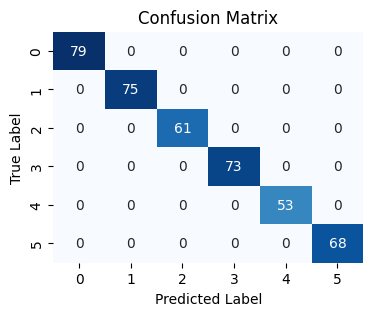

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.3283 - accuracy: 0.9007 - val_loss: 1.5285 - val_accuracy: 0.3560
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 1.2575 - val_accuracy: 0.5217
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0484 - accuracy: 0.9837 - val_loss: 0.7721 - val_accuracy: 0.7677
Epoch 4/10
92

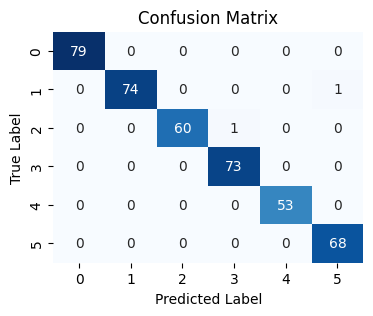

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.99      0.99        75
           2       1.00      0.98      0.99        61
           3       0.99      1.00      0.99        73
           4       1.00      1.00      1.00        53
           5       0.99      1.00      0.99        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409



In [ ]:
CNN(X_s_RS, Y_RS,40,10,15)
CNN(X_s_TR, Y_TR,40,10,15)

##### Drop the features

Let's frop the previously identified least significant features

Random sampled data
         X1        Y1        Z1        X4        Y4        Z4
0  0.607682  0.433367  0.399417  0.419355  0.419036  0.221420
1  0.614540  0.543235  0.416910  0.449223  0.388133  0.293622

Truncated data
         X1        Y1        Z1        X4        Y4        Z4
0  0.521618  0.569672  0.234797  0.452695  0.402200  0.286885
1  0.609484  0.569672  0.239865  0.526946  0.484108  0.308743
Epoch 1/10
92/92 [==============================] - 2s 11ms/step - loss: 0.3298 - accuracy: 0.8854 - val_loss: 1.8459 - val_accuracy: 0.1970
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0418 - accuracy: 0.9854 - val_loss: 2.3643 - val_accuracy: 0.2323
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 2.7100 - val_accuracy: 0.3315
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 2.2896 - val_accuracy: 0.4986
Epoch 5/10
92/92 [=============

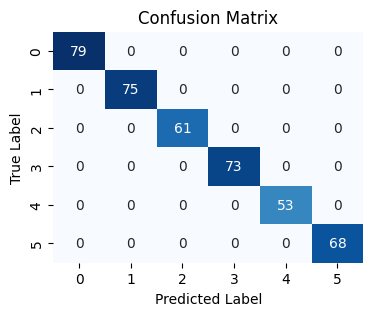

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.4953 - accuracy: 0.8405 - val_loss: 1.7287 - val_accuracy: 0.3288
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 0.2144 - accuracy: 0.9453 - val_loss: 1.9657 - val_accuracy: 0.2582
Epoch 3/10
92/92 [==============================] - 1s 8ms/step - loss: 0.1619 - accuracy: 0.9517 - val_loss: 1.8711 - val_accuracy: 0.3859
Epoch 4/10
92

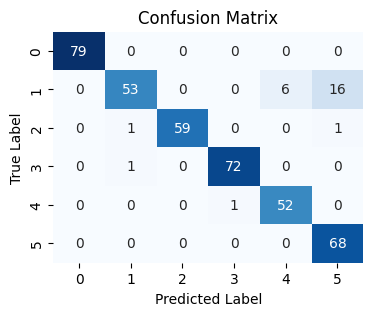

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       0.96      0.71      0.82        75
           2       1.00      0.97      0.98        61
           3       0.99      0.99      0.99        73
           4       0.90      0.98      0.94        53
           5       0.80      1.00      0.89        68

    accuracy                           0.94       409
   macro avg       0.94      0.94      0.94       409
weighted avg       0.94      0.94      0.93       409



In [ ]:
print('Random sampled data')
X_RS_feature_drp= X_s_RS.copy()
X_RS_feature_drp.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
print(X_RS_feature_drp.head(2))

print('\nTruncated data')
X_TR_feature_drp= X_s_TR.copy()
X_TR_feature_drp.drop(['X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X5', 'Y5', 'Z5' ], axis=1, inplace=True)
print(X_TR_feature_drp.head(2))

CNN(X_RS_feature_drp, Y_RS,40,10,6)
CNN(X_TR_feature_drp, Y_TR,40,10,6)


##### Hyper Parameter Optimization

In [ ]:
def M2Opt(frame_size, no_of_features, filters, kernel_size, dense_units, dropout_rate):
    model = keras.Sequential([
        layers.Input(shape=(frame_size, no_of_features)),
        layers.Conv1D(filters, kernel_size, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Conv1D(filters*2, kernel_size, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dropout(dropout_rate),
        layers.Dense(dense_units, activation='relu'),
        layers.Dense(6, activation='softmax')
    ])
    return model

def CNNOpt(X, Y, frame_size, stride, no_of_features):
    # Define hyperparameters to tune
    param_grid = {
        'filters': [32, 64],
        'kernel_size': [3, 5],
        'dense_units': [32, 64],
        'dropout_rate': [0.3, 0.5]
    }


    X_frames, Y_frames = framing(X,Y,frame_size,stride)

    # Split data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_frames, Y_frames, test_size=0.1, random_state=42)

    best_accuracy = 0
    best_params = {}

    # Perform grid search
    for filters in param_grid['filters']:
        for kernel_size in param_grid['kernel_size']:
            for dense_units in param_grid['dense_units']:
                for dropout_rate in param_grid['dropout_rate']:
                    # Create model
                    model = M2Opt(frame_size, no_of_features, filters, kernel_size, dense_units, dropout_rate)

                    # Compile model
                    optimizer = keras.optimizers.Adam(learning_rate=0.001)
                    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                    # Train model
                    model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

                    # Evaluate model
                    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)

                    # Check if current model is the best
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'filters': filters, 'kernel_size': kernel_size, 'dense_units': dense_units, 'dropout_rate': dropout_rate}

    print("Best parameters found: ", best_params)
    print("Best accuracy found: ", best_accuracy)

    # Re-train model with best parameters
    best_model = M2Opt(frame_size, no_of_features, **best_params)
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    best_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    best_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

    # Predict on test set
    Y_pred = np.argmax(best_model.predict(X_test), axis=1)

    # Get confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    plotConfMatrix(conf_matrix)

    # Get classification report
    class_report = classification_report(Y_test, Y_pred)
    print("Classification Report:")
    print(class_report)

Best parameters found:  {'filters': 32, 'kernel_size': 3, 'dense_units': 32, 'dropout_rate': 0.3}
Best accuracy found:  1.0
Epoch 1/10
92/92 [==============================] - 3s 15ms/step - loss: 0.1662 - accuracy: 0.9551 - val_loss: 1.3746 - val_accuracy: 0.7079
Epoch 2/10
92/92 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 1.4160 - val_accuracy: 0.4457
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 1.0602 - val_accuracy: 0.5231
Epoch 4/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2740 - val_accuracy: 0.9117
Epoch 5/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.0571 - val_accuracy: 0.9918
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0188 - val_accuracy: 0.9986
Epoch 7/10
92/92 [================

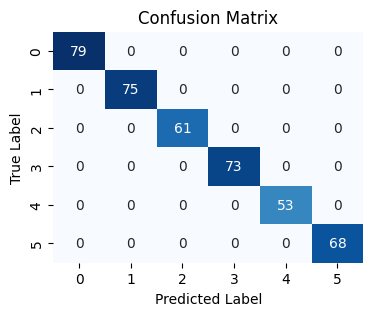

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        73
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68

    accuracy                           1.00       409
   macro avg       1.00      1.00      1.00       409
weighted avg       1.00      1.00      1.00       409

Best parameters found:  {'filters': 32, 'kernel_size': 3, 'dense_units': 32, 'dropout_rate': 0.3}
Best accuracy found:  0.9975550174713135
Epoch 1/10
92/92 [==============================] - 2s 10ms/step - loss: 0.3072 - accuracy: 0.8997 - val_loss: 1.5479 - val_accuracy: 0.1766
Epoch 2/10
92/92 [==============================] - 1s 7ms/step - loss: 0.0709 - accuracy: 0.9769 - val_loss: 1.5112 - val_accuracy: 0.4117
Epoch 3/10
92/

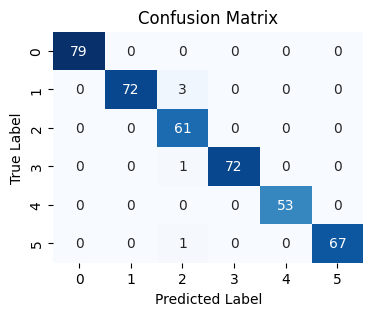

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.96      0.98        75
           2       0.92      1.00      0.96        61
           3       1.00      0.99      0.99        73
           4       1.00      1.00      1.00        53
           5       1.00      0.99      0.99        68

    accuracy                           0.99       409
   macro avg       0.99      0.99      0.99       409
weighted avg       0.99      0.99      0.99       409



In [ ]:
CNNOpt(X_s_RS, Y_RS, 40, 10, 15)
CNNOpt(X_s_TR, Y_TR, 40, 10, 15)
#CNN_Opt(X_s_RS.values, Y_RS.values, 40, 10, 15)
#CNN_Opt(X_s_TR.values, Y_TR.values, 40, 10, 15)

In [ ]:
#models = []f
#models.append(('KNN1',KNeighborsClassifier(n_neighbors=1)))
#models.append(('KNN2',KNeighborsClassifier(n_neighbors=2)))
#models.append(('KNN3',KNeighborsClassifier(n_neighbors=3)))
#models.append(('KNN4',KNeighborsClassifier(n_neighbors=4)))
#models.append(('KNN5',KNeighborsClassifier(n_neighbors=5)))
#models.append(('KNN6',KNeighborsClassifier(n_neighbors=6)))
#models.append(('KNN7',KNeighborsClassifier(n_neighbors=7)))